In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import scipy.spatial
from random import randint
from math import sqrt
from operator import itemgetter
seaborn.set()
print('¡Bibliotecas Cargadas!')

¡Bibliotecas Cargadas!


In [2]:
df = pd.read_csv("oasis_cross-sectional.csv")
df.head(500)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


Mostramos nuestro Dataset, con ello podremos visualizar las variables, la clase, y el tipo de dato al cual pertenecen.



*   **ID:** Identificación del sujeto
*   **M/F:** Sexo del paciente
*   **Hand:** Mano dominante
*   **Age:** Edad del paciente
*   **EDUC:** Almacena años de educación,
      * 1 secundaria incompleta;
      * 2 secundaria completa;
      * 3 universidad incompleta;
      * 4 universidad completa;
      * 5 post-grado;
      
*   **SES:** Estatus Socioeconomico, clasificado en 1 (mejor estatus) a 5 (peor estatus)
*   **MMSE:** Mini examen del estado mental, que mide funciones cognitivas, se almacenan puntajes del 0 (peor) al 30 (Mejor), menores a 24 se consideran anormal.
*   **CDR:** Calificación de demencia clínica, evalua el grado de deterioro cognitivo (Clase)
      * 0: Sin demencia;
      * 0,5: Demencia muy leve;
      * 1: Demencia leve;
      * 2: Demencia moderada;

*   **eTIV:** Volumen intracraneal total estimado, relacionado con el volumen que ocupa el cerebro
*   **nWBV:** Volumen total del cerebro normalizado
* **ASF:** Factor de escala Atlas, proporciona una solución automatizada al problema ampliamente 
      encontrado de corregir la variación del tamaño de la cabeza en los análisis morfométricos regionales y de todo el cerebro, 
      siempre que se utilice un atlas objetivo apropiado para la edad y la población.
* **Delay:** Almacena la cantidad de días entre sesiones de MRI.

In [3]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


Creamos unas estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

# Balanceado
## Limpieza de datos
Como se muestra a continuación existe una gran cantidad de filas o muestras cuyos datos se encuentran ausente, lo primero que haremos es eliminar esas muestras debido a que unicamente provocaran torpeza en el estudio.
### Columnas y filas innecesarias 
Borramos todas las filas con valores indefinidos o nulos.

In [4]:
print(df.isna().sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


In [5]:
df = df.rename(columns={'M/F':'Sex'})
df.dropna(subset=['Educ'],inplace=True)
df.drop(columns=['ID','Hand','SES'], axis = 1, inplace=True)

Mientras se limpiaba los datos innecesarios, se nos presento la columna socioeconomic status por sus siglas "SES", la cuál tiene una carga de valor importante, esta podria relacionar habitos propios de una clase economica a la prediccion de demencia (habitos alimenticios, trabajo fisico, carga de estres, entre otros), pero, al momento de analisar dicha columna nos encontramos que carece de datos, es decir, muchas de sus filas estan vacias, por lo cuál desarrollando una solucion, se opto por inhabilitar esta columna, ya que el dejarla significaria que por el metodo de trabajo realizado de borrar toda fila con datos faltanta, una muestra demasiado pequeña.

Esta carga de valor se le transfirio a la columna Education, dicha esta nos presenta un panorama similar, dabido a que dependiendo del nivel educacional podriamos crear un paralelismo con el nivel socioeconomico.

In [6]:
df.dropna(axis=1,inplace=True)
df = df.fillna("", inplace=False)

for i in range(len(df)):
  if df.loc[df.index[i],'Sex']=='F':
    df.loc[df.index[i],'Sex']=0
  else:
    df.loc[df.index[i],'Sex']=1

df=df[['CDR','Sex','Age','Educ','MMSE','eTIV','nWBV','ASF']]
print(df.isna().sum())
df.head(300)

CDR     0
Sex     0
Age     0
Educ    0
MMSE    0
eTIV    0
nWBV    0
ASF     0
dtype: int64


,CDR,Sex,Age,Educ,MMSE,eTIV,nWBV,ASF
0,0.0,0,74,2.0,29.0,1344,0.743,1.306
1,0.0,0,55,4.0,29.0,1147,0.810,1.531
2,0.5,0,73,4.0,27.0,1454,0.708,1.207
8,0.0,1,74,5.0,30.0,1636,0.689,1.073
9,0.0,0,52,3.0,30.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...
411,0.5,0,70,1.0,29.0,1295,0.748,1.355
412,0.5,0,73,3.0,23.0,1536,0.730,1.142
413,0.0,0,61,2.0,28.0,1354,0.825,1.297
414,0.0,1,61,5.0,30.0,1637,0.780,1.072


In [7]:
df.loc[df.index[23]]

CDR       0.5
Sex         0
Age        62
Educ      2.0
MMSE     28.0
eTIV     1350
nWBV    0.758
ASF       1.3
Name: 37, dtype: object

In [8]:
df.loc[23]

CDR       0.0
Sex         0
Age        58
Educ      5.0
MMSE     30.0
eTIV     1235
nWBV     0.82
ASF     1.421
Name: 23, dtype: object

Ahora que hemos eliminado cualquier vacio que podria estropear nuestro estudio, debemos seguir con el siguiente paso.

## Balanceo
Ya creado una Dataframe sin variables vacias, nos encontramos con otro gran problema, el des-balanceo, esto debido a la clase seleccionada: 

**CDR**, como se menciono anteriormente esta variable es la clasificacion de demencia clinica, y su importacia radica en la ponderacion del puntaje dado para cada paciente, que va desde 0, hasta 2, para el resultado de este estudio se le asignara la "clase" de este Dataframe.

Examinando el resultado entregado por el punto anterior podemos observar que existe una gran desproporción del CDR como se muestra a continuación:

,CDR,count
0,0.0,135
1,0.5,70
2,1.0,28
3,2.0,2


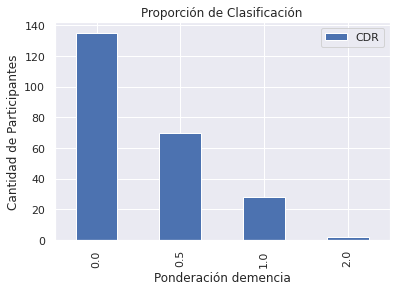

In [9]:
df.CDR.groupby(df.CDR).count().plot(kind='bar', legend='Reverse')
plt.ylabel('Cantidad de Participantes')
plt.xlabel('Ponderación demencia')
plt.title('Proporción de Clasificación')
df.groupby(['CDR']).size().reset_index(name = 'count')

La primera solución cuenta aquellos que obtuvieron 0, es decir, sin demencia, hasta 0.5, demencia muy leve, y por otro, aquellos que presentaron indices de demencia leve o moderada.

Pero al momento de presentarse esta solución se volvia a generar una desproporcion debido a que la condicion de agrupamiento generaba un grupo (Sin demencia, demencia muy leve) de una cantidad de 205, mientras que el otro grupo (demencia leve, moderada) un total de 30,  esta respuesta planteada no satisface el principio del balanceo, por lo que se propuso cambiar levemente la condición de agrupamiento:

Aquellos sin demencia formaran parte del primer grupo y aquellos que muestren rastros de demencia ya sea leve hasta moderada formaran parte del otro grupo.


In [10]:
for i, row in df.iterrows():
  if df.loc[i,'CDR']!=0.0:
    df.loc[i,'CDR']=int(1)

df['CDR'] = df['CDR'].apply(np.int64)
df.groupby(['CDR']).size().reset_index(name = 'count')

,CDR,count
0,0,135
1,1,100


Con la presente solucion evitamos crear un set de datos demaciado pequeño 

,CDR,Count
0,0,100
1,1,100


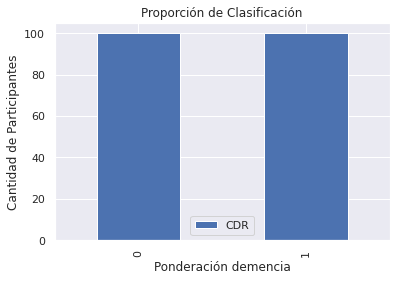

In [11]:
count = df["CDR"].value_counts()
for i, row in count.items():
  if row > 100:
    indices = df[df["CDR"]== i].sample(n=(row - 100), random_state=1).index
    df = df.drop(labels=indices, axis=0)

df.CDR.groupby(df.CDR).count().plot(kind='bar', legend='Reverse')
plt.ylabel('Cantidad de Participantes')
plt.xlabel('Ponderación demencia')
plt.title('Proporción de Clasificación')
df.groupby(['CDR']).size().reset_index(name = 'Count')

In [12]:
print(df)

     CDR Sex  Age  Educ  MMSE  eTIV   nWBV    ASF
0      0   0   74   2.0  29.0  1344  0.743  1.306
1      0   0   55   4.0  29.0  1147  0.810  1.531
2      1   0   73   4.0  27.0  1454  0.708  1.207
8      0   1   74   5.0  30.0  1636  0.689  1.073
9      0   0   52   3.0  30.0  1321  0.827  1.329
..   ...  ..  ...   ...   ...   ...    ...    ...
410    1   1   75   1.0  22.0  1656  0.762  1.060
411    1   0   70   1.0  29.0  1295  0.748  1.355
412    1   0   73   3.0  23.0  1536  0.730  1.142
414    0   1   61   5.0  30.0  1637  0.780  1.072
415    0   0   62   3.0  26.0  1372  0.766  1.279

[200 rows x 8 columns]


# Normalizado 
Este paso fundamental nos ayudara a evitar cualquier tipo de anomalía, redundancia y borrado que pudiera haber en el diseño de tablas y en la relación entre la información.


In [13]:
for i in df.columns:
  if i != "CDR":
    norm = (df[i]-df[i].mean())/df[i].std()
    df[i] = norm

print(df)

     CDR       Sex       Age      Educ      MMSE      eTIV      nWBV       ASF
0      0 -0.707983  0.074460 -0.858312  0.589811 -0.682718 -0.060316  0.645622
1      0 -0.707983 -1.580198  0.667576  0.589811 -1.875159  1.375278  2.327999
2      1 -0.707983 -0.012628  0.667576  0.073565 -0.016888 -0.810254 -0.094624
8      0    1.4054  0.074460  1.430521  0.847934  1.084758 -1.217363 -1.096574
9      0 -0.707983 -1.841460 -0.095368  0.847934 -0.821937  1.739533  0.817598
..   ...       ...       ...       ...       ...       ...       ...       ...
410    1    1.4054  0.161547 -1.621257 -1.217050  1.205818  0.346792 -1.193778
411    1 -0.707983 -0.273889 -1.621257  0.589811 -0.979315  0.046818  1.012006
412    1 -0.707983 -0.012628 -0.095368 -0.958927  0.479458 -0.338865 -0.580644
414    0    1.4054 -1.057675  1.430521  0.847934  1.090811  0.732475 -1.104051
415    0 -0.707983 -0.970587 -0.095368 -0.184558 -0.513234  0.432500  0.443736

[200 rows x 8 columns]


# Creacion archivo formato .xlsx procesado primera parte

In [15]:
df.to_excel('df_parte1_normalizado.xlsx')

# Validación cruzada
## K-Fold Cross Validation
* La Validación Cruzada o k-fold Cross Validation consiste en tomar los datos originales y  crear a partir de ellos dos conjuntos separados: un primer conjunto de entrenamiento (y prueba), y un segundo conjunto de validación.

* Su importancia radica en la calidad de las mediciones que deseamos obtener, ya que sin este metodo, nuestro modelo simplemente repetiría las etiquetas de las muestras que acaba de ver,  tendría una puntuación perfecta, pero no podría predecir nada útil todavía, es decir, tendria un sobreajuste.

**Es por que deseamo evaluar la precisión en la predicción y su error**.



In [30]:
def foldk(data, i, k):
    n = len(data)
    return data[n*(i-1)//k:n*i//k]


folds = {}
a = pd.DataFrame()
for i in range(0,5):
    test = foldk(df.sample(frac=1, random_state=1), i+1, 5)
    train = df.drop(labels=test.index, axis=0)
    folds[i] = {'entrenamiento': train, 'prueba': test}
a, b= test, train

In [29]:
a

,CDR,Sex,Age,Educ,MMSE,eTIV,nWBV,ASF
403,0,-0.707983,1.467856,-1.621257,0.589811,-0.573764,-1.560191,0.518509
57,0,-0.707983,-0.012628,-0.095368,0.847934,-0.004782,0.175378,-0.109579
256,0,-0.707983,1.554943,1.430521,0.847934,1.556892,0.003964,-1.462958
245,1,-0.707983,0.161547,-0.095368,-0.184558,-0.616135,-0.017463,0.570849
364,1,-0.707983,0.248634,-0.095368,0.847934,-0.646400,0.368219,0.600758
18,0,-0.707983,-2.189809,1.430521,0.589811,-0.791672,0.839608,0.772735
124,1,1.4054,0.596983,-0.858312,-1.733296,0.225232,-1.731605,-0.333896
264,0,-0.707983,-0.796413,0.667576,0.847934,-0.252955,0.432500,0.152124
1,0,-0.707983,-1.580198,0.667576,0.589811,-1.875159,1.375278,2.327999
115,1,1.4054,-0.012628,-0.858312,-0.958927,1.236083,-0.788827,-1.223686


# Creación archivo formato .xlsl procesado segunda parte

In [ ]:
writer = pd.ExcelWriter('df_parte2_folds.xlsx')
for i in range(0,5):
  folds[i]["prueba"].to_excel(writer, sheet_name=("test"+str(i+1)))
  folds[i]["entrenamiento"].to_excel(writer, sheet_name="train"+str(i+1))

writer.save()
writer.close()

# K-Nearest-Neighbor
Escencialmente sirve para poder clasificar valores encontrando los puntos más cercanos, es decir, consiste en estimar el valor de un dato desconocido a partir de las características de los datos más próximos.

La medida de distancia para la realización de este algoritmo es la euclidiana simple, en la cual ocuparemos el metodo euclidian de la libreria scipy, ya que si bien se puede realizar por medio de un metodo "manual", este es irrelevante y solo gastariamos tiempo en el por eso el uso de esta libreria.

In [ ]:
def disteuclidiana(test, train):
    del test['CDR'] #Se borra temporalmente la columna elegida como clase tanto en test como en train
    del train['CDR']
    return  scipy.spatial.distance.euclidean(train, test)

Definimos una funcion la cual con nuestros datos de testeo y entrenamiento rellena las columnas de un diccionario temporal, y se va agregando al un dataframe vacio.

In [ ]:
def kvecinos(test, train, newdict):
    newdict = pd.DataFrame()
    d = {}
    for j in range(len(test)):
        aux = pd.DataFrame()
        for q in range(len(train)):
            distancia = disteuclidiana(test.iloc[j], train.iloc[q])
            d['Distancia'] = distancia
            d['Index_test'] = test.index[j]
            d['Index_train'] = train.index[q]
            d['CDR_test'] = test.loc[test.index[j], 'CDR']
            d['CDR_train'] = train.loc[train.index[q], 'CDR']  
            aux = aux.append(d, ignore_index=True)
        aux = aux.sort_values('Distancia')
        newdict = newdict.append(aux[0:k], ignore_index=True) 

    return newdict

Dentro de la funcion predicción, y por medio de "sub conjuntos", leeremos el dataframe distancias y por if podremos rellenar correctamente la clase predicha.

In [ ]:
def prediccion(distancias):
    aux = pd.DataFrame()
    data = pd.DataFrame()
    d = {}
    count0 = 0
    count1 = 0
    for i in range(0,40):
        min = k*i
        max = k*(i+1)
        aux = distancias[min:max].reset_index()
        for j in range(0, k):
            if aux.loc[aux.index[j], 'CDR_train'] == 1.0:
                count1+=1
            else: 
                count0+=1
        if count1 > count0:
            d['CDR_predictorio'] = 1
        else:
            d['CDR_predictorio'] = 0
        d['CDR_test'] = aux.loc[aux.index[0], 'CDR_test']
        d['Index_test']= aux.loc[aux.index[0], 'Index_test']
        count0 = 0
        count1 = 0
        data = data.append(d, ignore_index=True)
    return data


Por ultimo aqui establecemos por medio de if la cantidad de exitos y fracaso al momento de predecir, para luego rellenar un nuevo con un nuevo conjunto de datos un dataframe

In [ ]:
def aciertos(prediccion, f):
  prob = {}
  exito = 0
  fracaso = 0 
  for j in range(0, 40):
      if prediccion.loc[prediccion.index[j], 'CDR_test'] == prediccion.loc[prediccion.index[j], 'CDR_predictorio']:
        exito = exito+1
      else: 
        fracaso=fracaso+1
  prob['Folds'] = int(f)
  prob['N° Aciertos'] = exito
  prob['N° Errores'] = fracaso
  prob['% Acierto Local'] = (exito*100)/(exito+fracaso)
  return prob

Esta funcion representa la funcion main del Knn.

In [ ]:
def knn():
    split = {}
    acierto =pd.DataFrame({})
    for i in range(0, 5):
        print("Procesando split número: ",i)
        if k == 3 or k == 5 or k == 7:
            split[i] = {}
            split[i] = kvecinos(folds[i]["prueba"], folds[i]["entrenamiento"], split[i])
        else: 
            print("Valor no aceptado")
            break      
        split[i] = prediccion(split[i])
        aux = aciertos(split[i], i)
        acierto = acierto.append(aux, ignore_index=True)
    acierto['% Acierto Global']= acierto['% Acierto Local'].sum(axis=0)/acierto.shape[0]
    acierto['Desviacion Estandar'] = np.std(acierto['% Acierto Local'])
    acierto['Folds'] = acierto['Folds'].apply(np.int64)
    acierto.set_index('Folds', inplace = True)
    print("¡LISTO!")
    acierto.to_excel('df_parte3_knn.xlsx')
    print(acierto)

# K-Means
## Clustering Algorithm
K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster.

In [ ]:
def distEuclidea(v1, v2):
    return  scipy.spatial.distance.euclidean(v1, v2)

In [ ]:
def kmeans(dataset):
  auxdata = dataset
  init_centroide=dataset.sample(n=2) 
  init_centroide= init_centroide.reset_index(drop=True)
  cluster_0= pd.DataFrame()
  cluster_1= pd.DataFrame()
  aux_centroide_0=pd.DataFrame()
  aux_centroide_1=pd.DataFrame()
  for q in range(50):
    for i in range(len(dataset)):
      dist_0=distEuclidea(init_centroide.iloc[0], dataset.iloc[i])   
      dist_1=distEuclidea(init_centroide.iloc[1], dataset.iloc[i])

      if dist_0 < dist_1:
        cluster_0=cluster_0.append(dataset.iloc[i])
      else:
        cluster_1=cluster_1.append(dataset.iloc[i])

    print("\n--------------------------------\n")
    assign_centroide_0=cluster_0.mean()
    assign_centroide_1=cluster_1.mean()

    cluster_0= pd.DataFrame()
    cluster_1= pd.DataFrame()

    for i in range(len(dataset)):
      dist_0=distEuclidea(assign_centroide_0, dataset.iloc[i])
      dist_1=distEuclidea(assign_centroide_1, dataset.iloc[i])
      if dist_0 < dist_1:
        cluster_0=cluster_0.append(auxdata.iloc[i])
      else:
        cluster_1=cluster_1.append(auxdata.iloc[i])

    aux_centroide_0 = pd.concat([init_centroide.iloc[0], assign_centroide_0], axis=1)
    aux_centroide_1 = pd.concat([init_centroide.iloc[1], assign_centroide_1], axis=1)
    
    std_0=(aux_centroide_0.std(axis=0)).mean(axis=0)
    std_1=(aux_centroide_1.std(axis=0)).mean(axis=0)
    print("Desviacion estantar en la iteracion: "+str(q))
    print(std_0)
    print(std_1)
    
  return cluster_0, cluster_1

# Menu de elección
## Clasificar o Agrupar
Esta funcion cumple el rol de menu debido a que esta permite al usuario elegir entre Knn o K-Means, en ambos casos eligiendo k

In [ ]:
a = int(input("1 para Clasificar\t  2 Para Agrupar")) #Ingresar la cantidad de vecinos mas cercanos.
    
if a == 1:
    print("Clasificacion en proceso")
    k = int(input("Ingrese k vecinos más cercanos"))#Ingresar la cantidad de vecinos mas cercanos.
    knn()
elif a == 2: 
    print("Agrupacion en proceso")
    datos = df.iloc[:, df.columns != "CDR"]
    clase = df.iloc[:, df.columns == "CDR"]
    kmeans(datos)
else:
    print("valor no valido")


Agrupacion en proceso

--------------------------------

Desviacion estantar en la iteracion: 0
0.5311241797996383
0.5843782413343506

--------------------------------

Desviacion estantar en la iteracion: 1
0.5341644992954903
0.5957530389428991

--------------------------------

Desviacion estantar en la iteracion: 2
0.5328538009634678
0.5985392017183526

--------------------------------

Desviacion estantar en la iteracion: 3
0.5323060994055493
0.600064171158845

--------------------------------

Desviacion estantar en la iteracion: 4
0.5323060994055493
0.600064171158845

--------------------------------

Desviacion estantar en la iteracion: 5
0.5323060994055493
0.600064171158845

--------------------------------

Desviacion estantar en la iteracion: 6
0.5323060994055493
0.600064171158845

--------------------------------

Desviacion estantar en la iteracion: 7
0.5323060994055493
0.600064171158845

--------------------------------

Desviacion estantar en la iteracion: 8
0.53230609940

KeyboardInterrupt: 